# Buffer-Stock Model with Human Capital

A household chooses its labor supply and consumption to maximize intertemporal utility
$$u=\log (c_t) + \varphi \frac{(1-\ell_t)^(1-\nu)}{1-\nu}$$
where $\ell_t\in (0,1)$. The households accumulate human capital as $$h_{t+1}=h_t+\ell_t$$ and human capital increases the labor income of the household as 
$$w_t = 1+\alpha h_t.$$
The household is also subject to transitory shocks $\psi_t$ and persistent shocks to permanent income $$p_{t+1}=p_t^{\rho_p} \xi_{t+1}.$$
The budget constraint thus writes
$$a_{t+1}+c_t = a_t(1+r)+p_t w_t \psi_t p_t \kappa_t \ell_t$$ 
where $\kappa_t$ is a life-cycle component of income. When a household retires, it gets an income $\kappa_t$. 

The Euler equation for savings writes
$$u'_{c,t} = \beta (1+r)\mathbb{E}[u'_{c,t+1}].$$ 
The Euler equation for labor writes

$$u'_{l,t}+p_t w_t \psi_t p_t \kappa_t u'_{c,t}=\beta\mathbb{E}\Big[u'_{l,t+1}-p_{t+1}\psi_{t+1} \kappa_{t+1} u'_{c,t+1} (\alpha l_{t+1} - (1+\alpha k_{t+1}))\Big]$$



# 1. Imports


In [101]:
%load_ext autoreload
%autoreload 2

from HumanCapitalModel import HumanCapitalModelClass
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "axes.grid": True,
    "grid.color": "black",
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "font.size": 14                    # Set font size
})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from EconDLSolvers import choose_gpu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Deep Learning Solution

In [147]:
# Hyperparameters
device = choose_gpu()
model_DL = {}

## 2.1 DeepSimulate

In [ ]:
# DeepSimulate
K_time = 1.0
model_DL['DeepSimulate'] = HumanCapitalModelClass(algoname='DeepSimulate', device=device,train={'K_time': K_time})
model_DL['DeepSimulate'].solve(do_print=True)

started solving: 2025-01-22 15:46:09
k =     0 of inf: sim.R =  -7.39544439 [best:  -7.39544439] [0.1 secs] [value_epochs =   0] [policy_epochs =   1] [  0.00 mins]
k =    50 of inf: sim.R =  -6.39536667 [best:  -6.39536667] [0.1 secs] [value_epochs =   0] [policy_epochs =   1] [  0.05 mins]
k =   100 of inf: sim.R =  -6.38103008 [best:  -6.38103008] [0.1 secs] [value_epochs =   0] [policy_epochs =   1] [  0.08 mins]
k =   150 of inf: sim.R =  -6.37873030 [best:  -6.37873030] [0.1 secs] [value_epochs =   0] [policy_epochs =   1] [  0.10 mins]
k =   200 of inf: sim.R =  -6.37649202 [best:  -6.37649202] [0.0 secs] [value_epochs =   0] [policy_epochs =   1] [  0.12 mins]
k =   250 of inf: sim.R =  -6.37450647 [best:  -6.37450647] [0.0 secs] [value_epochs =   0] [policy_epochs =   1] [  0.15 mins]
k =   300 of inf: sim.R =  -6.37375784 [best:  -6.37375784] [0.0 secs] [value_epochs =   0] [policy_epochs =   1] [  0.18 mins]
k =   350 of inf: sim.R =  -6.37315273 [best:  -6.37315273] [0.1 se

## 2.2 DeepVPD

In [171]:
# Deep VPD
K_time = 3.0
model_DL['DeepVPD'] = HumanCapitalModelClass(algoname='DeepVPD', device=device,train={'K_time': K_time})
model_DL['DeepVPD'].solve(do_print=True)

started solving: 2025-01-22 16:01:07
k =     0 of inf: sim.R =  -7.45488691 [best:  -7.45488691] [0.5 secs] [value_epochs =  45] [policy_epochs =   0] [  0.01 mins]
k =    10 of inf: sim.R =  -7.45488691 [best:  -7.45488691] [0.4 secs] [value_epochs =  50] [policy_epochs =   0] [  0.08 mins] no improvements in 0.1 mins
k =    20 of inf: sim.R =  -7.45488691 [best:  -7.45488691] [0.3 secs] [value_epochs =  50] [policy_epochs =   0] [  0.12 mins] no improvements in 0.1 mins
k =    30 of inf: sim.R =  -7.45488691 [best:  -7.45488691] [0.3 secs] [value_epochs =  50] [policy_epochs =   0] [  0.17 mins] no improvements in 0.2 mins
k =    40 of inf: sim.R =  -7.45488691 [best:  -7.45488691] [0.3 secs] [value_epochs =  50] [policy_epochs =   0] [  0.21 mins] no improvements in 0.2 mins
k =    50 of inf: sim.R =  -6.77537966 [best:  -6.77537966] [0.4 secs] [value_epochs =  50] [policy_epochs =  15] [  0.27 mins]
k =    60 of inf: sim.R =  -6.37970066 [best:  -6.37970066] [0.4 secs] [value_epoch

## 2.3 DeepFOC

In [ ]:
# Deep FOC
model_DL['DeepFOC_KKT'] = HumanCapitalModelClass(algoname='DeepFOC', device=device, par = {'KKT':True},train={'K_time': K_time})
model_DL['DeepFOC_KKT'].solve(do_print=True)

started solving: 2025-01-22 15:53:36
k =     0 of inf: sim.R =  -7.10061550 [best:  -7.10061550] [0.4 secs] [value_epochs =   0] [policy_epochs =  15] [  0.01 mins]
k =    10 of inf: sim.R =  -6.39076710 [best:  -6.39076710] [0.6 secs] [value_epochs =   0] [policy_epochs =  15] [  0.08 mins]
k =    20 of inf: sim.R =  -6.38011265 [best:  -6.38011265] [0.2 secs] [value_epochs =   0] [policy_epochs =  15] [  0.14 mins]
k =    30 of inf: sim.R =  -6.37808228 [best:  -6.37808228] [0.2 secs] [value_epochs =   0] [policy_epochs =  15] [  0.17 mins]
k =    40 of inf: sim.R =  -6.37695742 [best:  -6.37695742] [0.2 secs] [value_epochs =   0] [policy_epochs =  15] [  0.20 mins]
k =    50 of inf: sim.R =  -6.37559605 [best:  -6.37559605] [0.2 secs] [value_epochs =   0] [policy_epochs =  15] [  0.24 mins]
k =    60 of inf: sim.R =  -6.37490225 [best:  -6.37490225] [0.1 secs] [value_epochs =   0] [policy_epochs =   6] [  0.28 mins]
k =    70 of inf: sim.R =  -6.37409687 [best:  -6.37409687] [0.6 se

# 4. Simulations

## 4.1 Life cycle comparisons

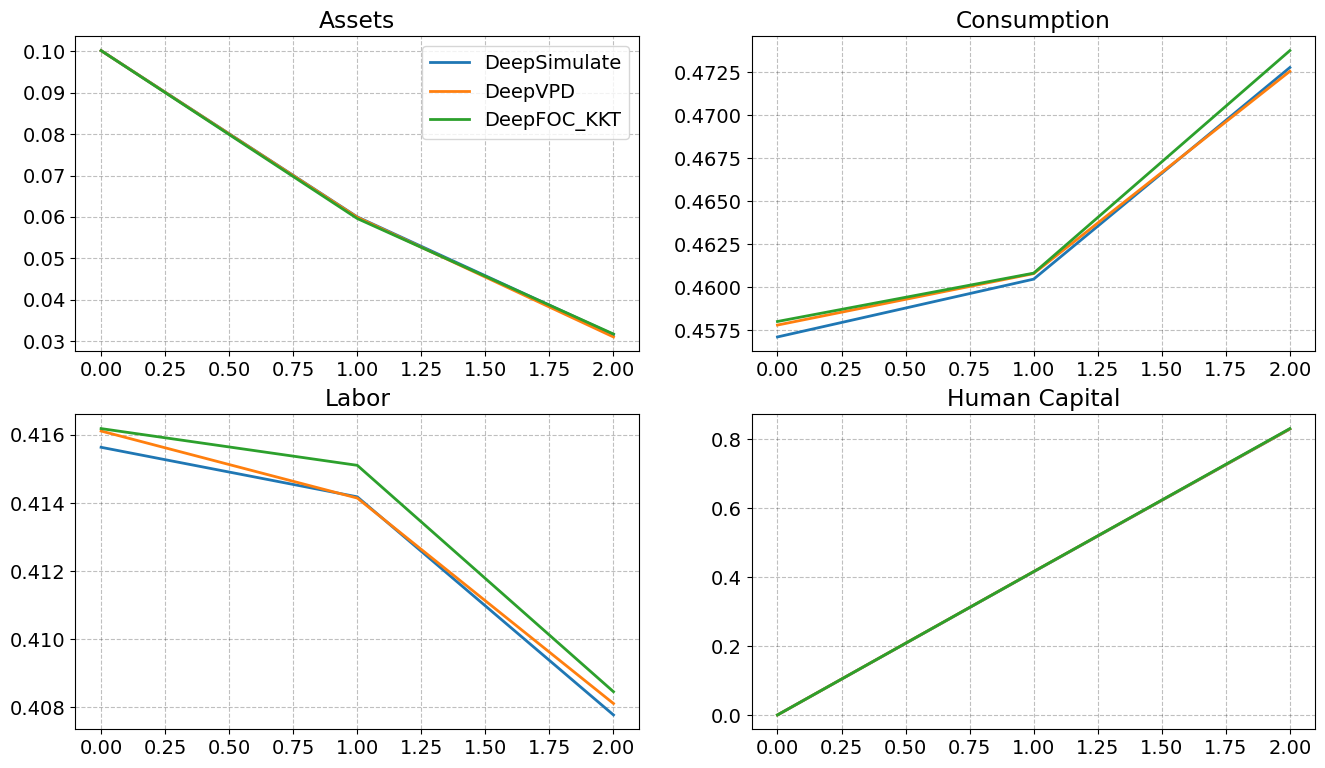

In [182]:

##############################
# Life cycle comparison plot #
##############################

figs, axes = plt.subplots(2, 2, figsize=(16, 9))

# DL models to loop over

# Titles and data indices for each subplot
titles = ['Assets', 'Consumption', 'Labor', 'human capital']

# Loop over DL models
for model_key, label in model_DL.items():
    axes[0,0].plot(np.mean(model_DL[model_key].sim.states[:, :, 0].cpu().numpy(), axis=1), label=model_key, lw =2)
    axes[0,1].plot(np.mean(model_DL[model_key].sim.outcomes[:, :, 0].cpu().numpy(), axis=1), lw = 2)
    axes[1,0].plot(np.mean(model_DL[model_key].sim.outcomes[:, :, 1].cpu().numpy(), axis=1), lw = 2)
    axes[1,1].plot(np.mean(model_DL[model_key].sim.states[:, :, 2].cpu().numpy(), axis=1), lw = 2)

axes[0,0].legend()
axes[0,0].set_title('Assets')
axes[0,1].set_title('Consumption')
axes[1,0].set_title('Labor')
axes[1,1].set_title('Human Capital')


plt.show()